<a href="https://colab.research.google.com/github/minsaee/ai_chat_python/blob/master/606_%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95_%ED%9A%8C%EA%B7%80%ED%8F%89%EA%B0%80%EC%A7%80%ED%91%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
# 난수 만들기.

# 0에서 1사이의 균일분포 만들기.
data = np.random.rand(10)
print(data)

# 가우시안 : 표준 정규분포 만들기 (평균:0, 표준편차:1)
data = np.random.randn(10)
print(data)

# 균일 분포의 정수 난수
data = np.random.randint(10)
print(data)

[0.5018739  0.78769994 0.80115332 0.65511677 0.17661391 0.03499468
 0.95775926 0.63208482 0.91716006 0.54024411]
[-0.32246798  0.12599438 -0.17307226 -1.06882215 -1.05495994 -0.68714767
  1.27959832 -0.38428785 -1.67759103 -0.28278343]
4


In [12]:
# 데이터 순서 바꾸기
print('np.random.shuffle') # 배열의 요소 변경
data = np.arange(10)
print(data)

item = np.random.shuffle(data) # 배열의 요소를 변경하여 기존 변수에 저장한다.
print(item) # return값 None
print(data)

print('-----------------')

print('np.random.permutation') # 배열의 요소 변경
item = np.random.permutation(data) # 배열의 요소를 변경하여 새 변수에 저장한다.
print(item)
print(data) # 기존 변수는 그대로다.

np.random.shuffle
[0 1 2 3 4 5 6 7 8 9]
None
[0 2 6 7 5 8 1 9 3 4]
-----------------
np.random.permutation
[3 4 8 5 1 6 7 0 2 9]
[0 2 6 7 5 8 1 9 3 4]


In [25]:
# 데이터 샘플링
# np.random.choice(a, size=None, replace=True, p=None)
# a : 배열 -> 배열, 정수 -> arange(a)배열
# replace = True -> 복원추출(중복O), False -> 비복원추출(중복X)
# p : 배열, 각 데이터가 선택될 수 있는 확률

print(np.random.choice(5,5,replace=False))

data = np.arange(10)
print(np.random.choice(data,5))

[4 0 2 1 3]
[4 4 8 3 4]


#### 추세선(Trend Line)
- 추세선(Trend Line)은 데이터의 추세를 그래픽으로 표시하고 예측 문제를 분석하는데 사용된다.
- 이러한 분석을 회귀분석(예측을 위해 사용하는 통계분석의 한가지)이라고 하며,
회귀분석을 사용하여 실제 데이터가 존재하지 않는 범위의 값을 예측할 수 있다.
- 추세선을 사용할 수 있는 차트 : 누적형이 아닌 2차원 영역형, 가로 막대형, 세로 막대형, 꺾은선형, 주식형,분산형, 거품형
- 추세선을 사용할 수 없는 차트 : 3차원, 누적형, 방사형, 원형, 표면형, 도넛형

<Axes: xlabel='X', ylabel='y'>

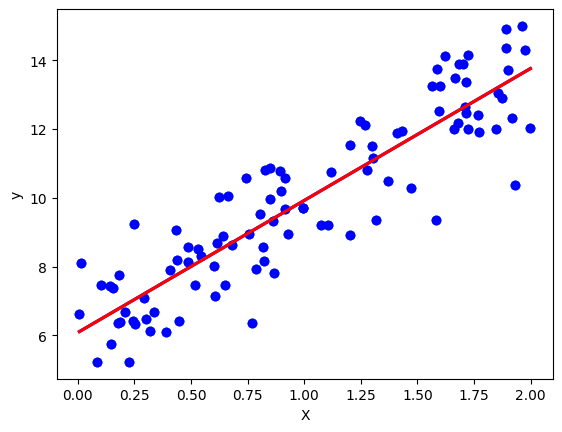

In [35]:
X = 2*np.random.rand(100,1)
y = 6+4*X+np.random.randn(100,1)

plt.scatter(X,y)
pd_X = pd.DataFrame(X, columns=['X'])
pd_y = pd.DataFrame(y, columns=['y'])
pd_df = pd.concat([pd_X, pd_y],axis =1) # 문자열 합치기
pd_df.head(2)

sns.regplot(x='X',y='y',data=pd_df, color='b', ci=None)
sns.regplot(x='X',y='y',data=pd_df, line_kws={'color':'red'}, scatter_kws={'color':'blue'},ci=None) # ci : 신뢰구간

###경사 하강법(gradient_descent_steps)_MSE(평균제곱오차계산식)

In [45]:
def get_weight_updates(w, b, X, y, learning_rate=0.01, l1=0.2, l2=0.7): # w,b하이퍼 파라미터 돌리면서 성능이 최대가 될 때
  N = len(y)

  # w,b와 동일한 크기를 가진 0값으로 초기화하기.
  w_update = np.zeros_like(w)
  b_update = np.zeros_like(b)

  # 예측 배열 계산하고 실제값의 차이 계산하기.
  # y_pred = wX+b
  y_pred = np.dot(X,w.T)+b # (4,1)(1,1) = (4,1) 행렬곱을 위해 전치(T) -> (1,1)(1,4)
  diff = y - y_pred # 바이시스 = 1 웨이트 값은 편미분

  # b_update를 dot행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  b_factors = np.ones((N,1))

  # w와 b를 업데이트 계산
  w_update = -(2/N)*learning_rate*learning_rate*(np.dot(X.T,diff)) # (4,1)->(1,4) 웨이트
  b_update = -(2/N)*learning_rate**np.dot(b_factors.T,diff) # (4,1)->(1,4) 바이시스
  return w_update, b_update

# 하이퍼 파라미터를 웨이트값으로 구하는 부분 식 러닝레이트 =? 알파?
# learningwate는 보폭 이동할 때
# J(w,b)=1/2*(y-y^)**2

In [44]:
# 입력 인자 epochs로 주어진 횟수만큼 반복적으로 w와b를 업데이트하기.
def gradient_descent_steps(X,y,epochs=2): # 2번 실행
  # w와b를 0으로 초기화하기.
  w = np.zeros((1,1))
  b = np.zeros((1,1))

  for ind in range(epochs):
    w_update,b_update = get_weight_updates(w, b, X, y, learning_rate=0.1)
    w = w - w_update
    b = b - b_update
    return w,b

In [53]:
# 실제 y값과 예측된 y값을 인자로 받아서 MSE(평균표준오차)구현하기.
# 경사하강법의 예측오류 계산하기.

def get_cost(y,y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

X = 2*np.random.rand(100,1)
y = 6+4*X+np.random.randn(100,1) # y = wX+b
print(X.shape)
print(y.shape)

w,b = gradient_descent_steps(X,y,epochs=1000)
print('w:{0:.3f}b:{1:.3f}'.format(w[0,0],b[0,0]))

y_pred = w[0,0]*X+b
print('Grident Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

(100, 1)
(100, 1)
w:0.235b:2.010
Grident Descent Total Cost:66.4511


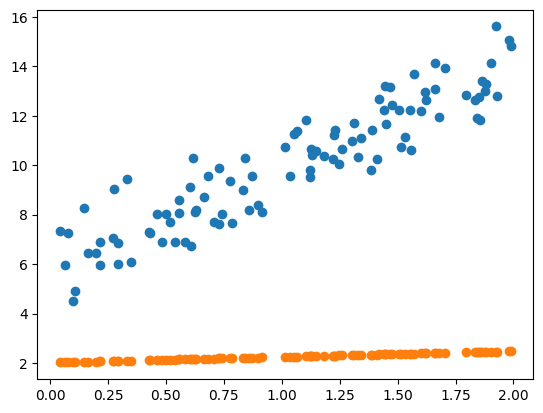

In [55]:
plt.scatter(X,y)
plt.scatter(X,y_pred)